# Centered Gaussian distributions 1D (independent)

In [1]:
import numpy as np
import matplotlib.pyplot as  plt
import scipy.stats as stats
from scipy.integrate import solve_ivp
from scipy.linalg import sqrtm

import ot

## d = 1

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Define parameters
num_samples = 1000
mu1 = 0
mu2 = 0
sigma1 = 5  # standard deviation of X
sigma2 = 10  # standard deviation of Y

### Sample generation

In [3]:
# Generate initial Gaussian samples
X = np.random.normal(mu1, sigma1, num_samples)
Y = np.random.normal(mu2, sigma2, num_samples)

## Euler-Maruyama in simple case

In [4]:
epsilon = 0.1
T = 3
N = 100
Dt = T/N
time  = np.linspace(0, T, N+1)
t_span = (0, T)

X_traj = np.zeros((num_samples, N+1))
Y_traj = np.zeros((num_samples, N+1))
X_traj[:, 0] = X
Y_traj[:, 0] = Y

### Time integration scheme for $\frac{d \sigma_t}{dt}$ (using RK23)

In [5]:
# Define the derivative function for the ODE for sigma_t
def d_sigma_dt(t, sigma_t, sigma_mu, sigma_nu, epsilon):
    factor = 1/sigma_mu + 1/sigma_nu
    return factor * (sigma_mu * sigma_nu - sigma_t * (sigma_t + epsilon))

<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_15275/12636690.py:8: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Numerical solution of $\dot{\sigma}_t$ using solve_ivp')


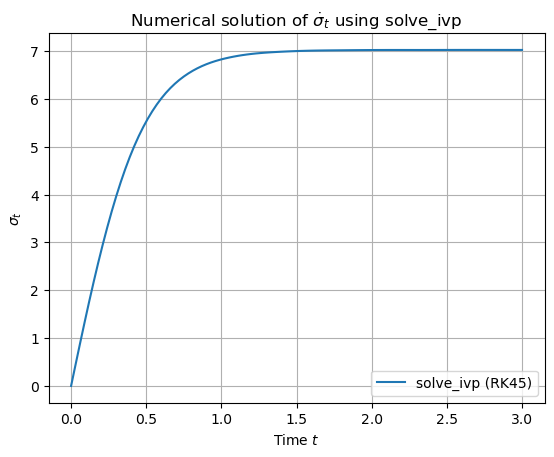

In [6]:
sigma_0 = 0  # Initial condition for sigma_t
sol = solve_ivp(d_sigma_dt, t_span, [sigma_0], args=(sigma1, sigma2, epsilon), t_eval=time, method='RK45')
sigma_t_values = sol.y[0]
# Plot
plt.plot(sol.t, sol.y[0], label='solve_ivp (RK45)')
plt.xlabel('Time $t$')
plt.ylabel(r'$\sigma_t$')
plt.title('Numerical solution of $\dot{\sigma}_t$ using solve_ivp')
plt.grid(True)
plt.legend()
plt.show()

0.16641974117189662
wasserstein_distance = 25.000


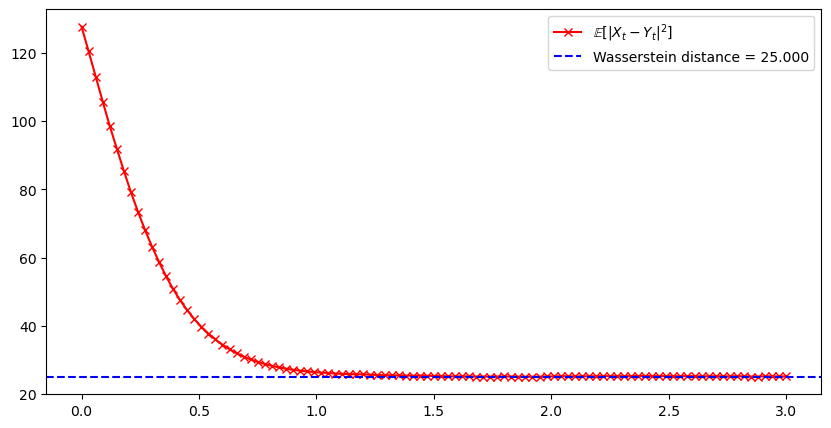

In [7]:
import sys
import os
# Add parent directory to the Python path
parent_dir = os.path.abspath("..")
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from wasserstein_distances import bures_wasserstein_distance_gaussian, sinkhorn_divergence_gaussian

from centered_gaussian_1D_EM import centered_gaussian_1D_EM

errors, X_traj, Y_traj, correlations = centered_gaussian_1D_EM(X, Y, epsilon, N, T, num_samples, sigma1, sigma2)
correlation_error = np.zeros(num_samples+1)
correlation_error = np.abs(correlations - sol.y[0])
# Wasserstein distance
wasserstein_distance = bures_wasserstein_distance_gaussian(mu1, sigma1, mu2, sigma2)
difference = np.abs(errors[-1] - wasserstein_distance)
print(difference)
print(f"wasserstein_distance = {wasserstein_distance:.3f}")


plt.figure(figsize=(10, 5))
plt.plot(time, errors, linestyle='-', marker='x', color='red', label=r'$\mathbb{E} [| X_t - Y_t |^2]$')
plt.axhline(y=wasserstein_distance, color='blue', linestyle='--', label=f'Wasserstein distance = {wasserstein_distance:.3f}')
plt.legend()

# print(np.abs(sigma_t - sigma_plus))
X_final = X_traj[:, -1]
Y_final = Y_traj[:, -1]

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_15275/183478978.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.axhline(y=sigma_plus, color='blue', linestyle='--', label=f'\sigma_+ = {sigma_plus:.3f}')


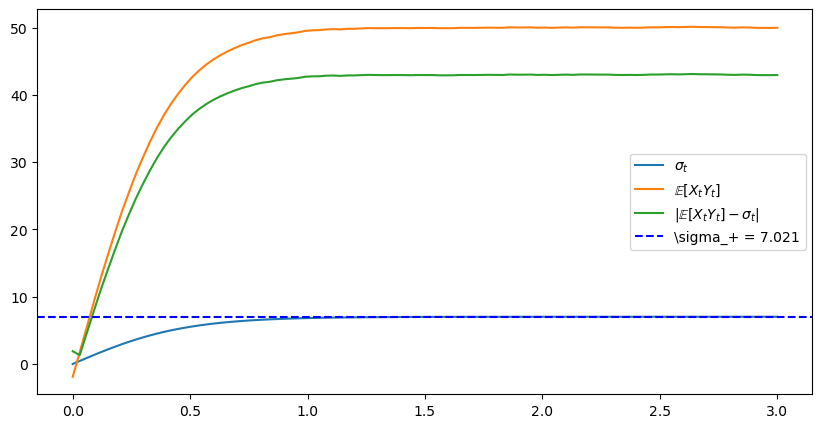

In [8]:
sigma_plus =  -(epsilon/2) + np.sqrt((epsilon/2)**2 + sigma1*sigma2)
plt.figure(figsize=(10, 5))
plt.plot(time, sol.y[0], label=r'$\sigma_t$')
plt.plot(time, correlations, label=r'$\mathbb{E} [X_t Y_t]$')
plt.plot(time, correlation_error, label=r'$|\mathbb{E} [X_t Y_t] - \sigma_t|$')
plt.axhline(y=sigma_plus, color='blue', linestyle='--', label=f'\sigma_+ = {sigma_plus:.3f}')

plt.legend()

plt.savefig('correlatio_error.png', dpi=300, bbox_inches='tight')
plt.show()

### 1) $\mathbb{E} \left[\left| X_t - Y_t \right|^2 \right]$ as a function of $\epsilon$ (entropic reg. parameter)

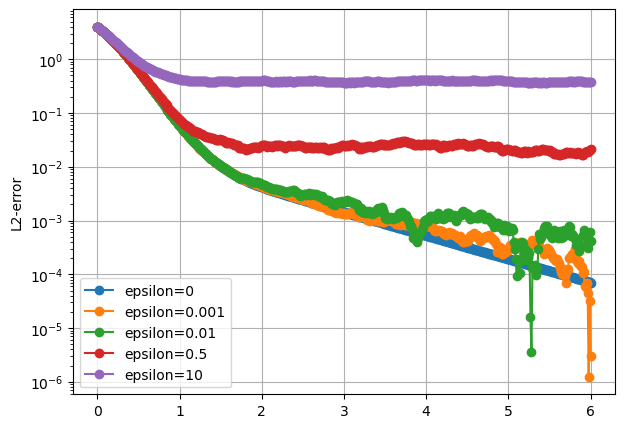

In [9]:
np.random.seed(40)
# Parameters
N = 500
T = 6
Dt = T / N
num_samples = 10**4  # Define the number of samples

epsilon_values = [0, 0.001, 0.01, 0.5, 10]  # Multiple epsilon values
X = np.random.normal(mu1, sigma1, num_samples)
Y = np.random.normal(mu2, sigma2, num_samples)

plt.figure(figsize=(7, 5))

for epsilon in epsilon_values:
    time = np.linspace(0, T, N + 1)
    errors, X_traj, Y_traj, correlations = centered_gaussian_1D_EM(X, Y, epsilon, N, T, num_samples, sigma1, sigma2)
    l2_errors = np.abs(errors-wasserstein_distance) / wasserstein_distance
    plt.semilogy(time, l2_errors, linestyle='-', marker='o', label=f'epsilon={epsilon}')

# plt.axhline(y=wasserstein_distance, color='blue', linestyle='--', label=fr'$\mathcal{{W}}_{{\mu, \nu}} = {wasserstein_distance:.2f}$')

# Finalize plot
plt.ylabel(f"L2-error")
plt.legend()
plt.grid(True)
plt.savefig('epsilon_variation.png', dpi=300, bbox_inches='tight')

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 700x500 with 0 Axes>

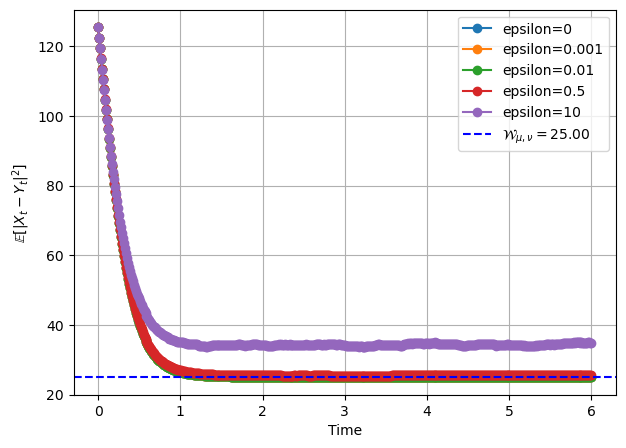

In [10]:
plt.figure(figsize=(7, 5))
plt.figure(figsize=(7, 5))

for epsilon in epsilon_values:
    time = np.linspace(0, T, N + 1)
    errors, X_traj, Y_traj, correlations = centered_gaussian_1D_EM(X, Y, epsilon, N, T, num_samples, sigma1, sigma2)
    l2_errors = np.abs(errors-wasserstein_distance) / wasserstein_distance
    plt.plot(time, errors, linestyle='-', marker='o', label=f'epsilon={epsilon}')
plt.axhline(y=wasserstein_distance, color='blue', linestyle='--', label=fr'$\mathcal{{W}}_{{\mu, \nu}} = {wasserstein_distance:.2f}$')
# Finalize plot
plt.xlabel("Time")
plt.ylabel(r"$\mathbb{E}[|X_t - Y_t|^2]$")
plt.legend()
plt.grid(True) 
plt.show

### 2) $\mathbb{E} \left[\left| X_t - Y_t \right|^2 \right]$ as a function of N (number of samples)

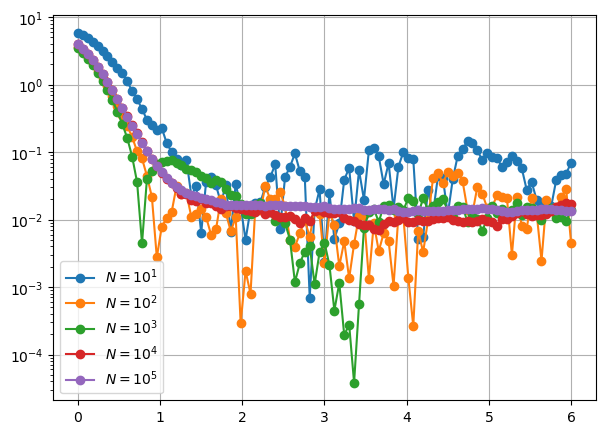

In [11]:
# Parameters
np.random.seed(42)
N = 100
Dt = T / N
epsilon = 0.3  # Keep epsilon constant
# num_samples_values = [10**i for i in range(1, 6)]  # Different values of num_samples
num_samples_values = [10, 100, 1000, 10**4, 10**5]  # Different values of num_samples

plt.figure(figsize=(7, 5))


# sol = solve_ivp(d_sigma_dt, t_span, [sigma_0], args=(sigma1, sigma2, epsilon), t_eval=time, method='RK23')
sigma_t_values = sol.y[0]
for num_samples in num_samples_values:
    time = np.linspace(0, T, N + 1)
    X = np.random.normal(mu1, sigma1, num_samples)
    Y = np.random.normal(mu2, sigma2, num_samples)
    errors, X_traj, Y_traj, correlations = centered_gaussian_1D_EM(X, Y, epsilon, N, T, num_samples, sigma1, sigma2)
    l2_errors = np.abs(errors-wasserstein_distance) / wasserstein_distance
    plt.semilogy(time, l2_errors, linestyle='-', marker='o', label=fr'$N = 10^{{{int(np.log10(num_samples))}}}$')


# Finalize plot
# plt.xlabel("Time")
# plt.ylabel(r"$\mathbb{E}[|X_t - Y_t|^2]$")
plt.legend()
plt.grid(True)
plt.savefig('N_variation.png', dpi=300, bbox_inches='tight')

plt.show()

### 3) $\mathbb{E} \left[\left| X_t - Y_t \right|^2 \right]$ as a function of $\Delta t$

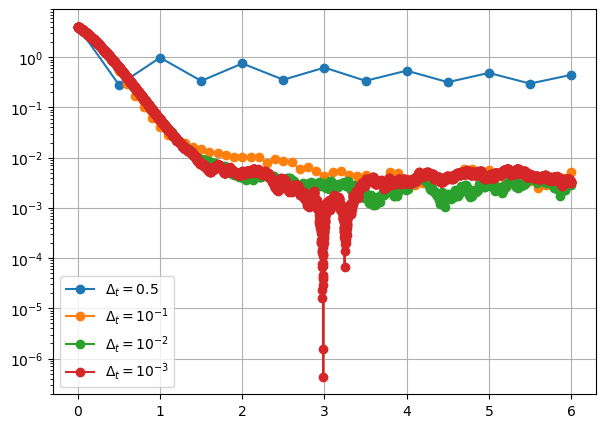

In [26]:
# Parameters

np.random.seed(42)
num_samples = 10**4  # Keep num_samples constant
X = np.random.normal(0, sigma1, num_samples)
Y = np.random.normal(0, sigma2, num_samples)
Dt_values = [0.5, 0.1, 0.01, 0.001]  # Different values for Δt
epsilon = 0.1  # Keep epsilon constant
T = 6
t_span = (0, T)
plt.figure(figsize=(7, 5))

for Dt in Dt_values:
    N = int(T / Dt)  # Adjust N based on Dt
    time = np.linspace(0, T, N + 1)
    errors, X_traj, Y_traj, correlations = centered_gaussian_1D_EM(X, Y, epsilon, N, T, num_samples, sigma1, sigma2)

    l2_errors = np.abs(errors-wasserstein_distance) / wasserstein_distance
    if Dt == 0.5:
        plt.semilogy(time, l2_errors, linestyle='-', marker='o', label=fr'$\Delta_t = {Dt}$')
    else:
        plt.semilogy(time, l2_errors, linestyle='-', marker='o', label=fr'$\Delta_t = 10^{{{int(np.log10(Dt))}}}$')

# Finalize plot
# plt.xlabel("Time")
# plt.ylabel(r"$\mathbb{E}[|X_t - Y_t|^2]$")

plt.legend()
plt.grid(True)
plt.savefig('Delta_t_variation.png', dpi=300, bbox_inches='tight')

plt.show()

# Sinkhorn algo

In [13]:
import matplotlib.pylab as pl
import ot
import ot.plot
from ot.datasets import make_1D_gauss as gauss

### Generate data

In [14]:
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)
res = ot.solve_sample(X, Y, method='gaussian')

# recover the squared Gaussian Bures-Wasserstein distance
BW_dist = res.value
print(BW_dist)

24.946786785216677


In [15]:
n = 100  # nb bins

# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
a = gauss(n, m=20, s=5)  # m= mean, s= std
b = gauss(n, m=60, s=10)

# loss matrix
M = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)))
M /= M.max()

### Plot distributions and loss matrix

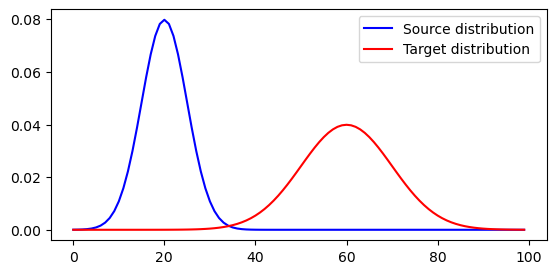

In [16]:
pl.figure(1, figsize=(6.4, 3))
pl.plot(x, a, "b", label="Source distribution")
pl.plot(x, b, "r", label="Target distribution")
pl.legend()

(<Axes: >, <Axes: >, <Axes: >)

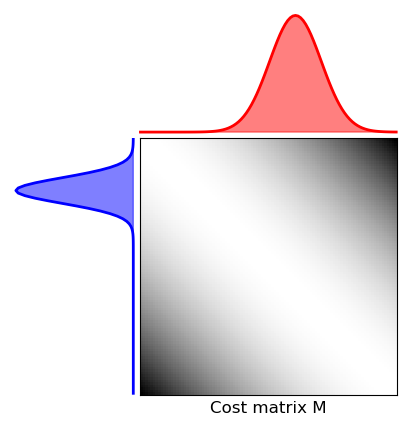

In [17]:
pl.figure(2, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, M, "Cost matrix M")

### Solve EMD

(<Axes: >, <Axes: >, <Axes: >)

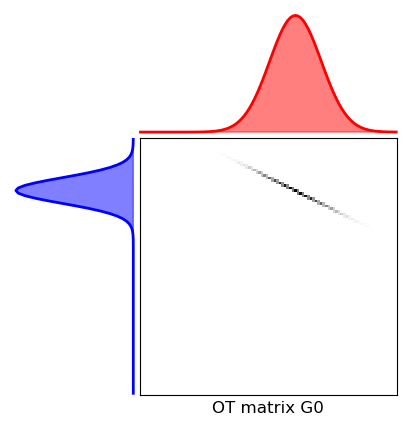

In [18]:
# use fast 1D solver
G0 = ot.emd_1d(x, x, a, b)

# Equivalent to
# G0 = ot.emd(a, b, M)

pl.figure(3, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, G0, "OT matrix G0")

In [19]:
W = 

SyntaxError: invalid syntax (702581706.py, line 1)

### Solve Sinkhorn

In [ ]:
lambd = 1e-3
Gs = ot.sinkhorn(a, b, M, lambd, verbose=True)

pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, Gs, "OT matrix Sinkhorn")

pl.show()

In [ ]:
import time
epsilon_values = [0, 0.01, 0.05, 0.1, 0.5]
wasserstein_list = []
time_list = []

for epsilon in epsilon_values:
    start_time = time.time()

    if epsilon == 0:
        W_value = ot.emd2(a, b, M)
    else:
        W_value = ot.sinkhorn2(a, b, M, reg=epsilon)

    elapsed = time.time() - start_time

    wasserstein_list.append(W_value)
    time_list.append(elapsed)

# Plotting on the same graph with two y-axes
fig, ax1 = plt.subplots(figsize=(8, 5))

color1 = 'tab:blue'
ax1.set_xlabel("Epsilon (Regularization)")
ax1.set_ylabel("Wasserstein² Distance", color=color1)
ax1.plot(epsilon_values, wasserstein_list, marker='o', color=color1, label="Wasserstein²")
ax1.tick_params(axis='y', labelcolor=color1)

# Second y-axis for time
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel("Computation Time (s)", color=color2)
ax2.plot(epsilon_values, time_list, marker='s', color=color2, label="Computation Time")
ax2.tick_params(axis='y', labelcolor=color2)

# Add grid and title
plt.title("Wasserstein² and Computation Time vs Epsilon")
fig.tight_layout()
plt.grid(True)
plt.show()